In [2]:
import pandas as pd
import numpy as np
import os,sys

import seaborn as sns
import matplotlib.pyplot as plt
from aux import fitCPH_and_plotKM_treatments

%matplotlib inline

In [3]:
annot = pd.read_csv("data/DASL.annotation_Kommoss.tsv.gz",sep ="\t",index_col=0)
print(annot.shape[0])
annot.head(2)

377


,bevacizumab,chemo_only,is_HGSOC,FIGO_code,FIGO_IV,FIGO_I-IIIB,FIGO_IIIC,FIGO_1,FIGO_2,FIGO_3,...,PFS_event,PFS_time,treatment,age,is_HGSOC_GEO,OS_event_GEO,OS_time_GEO,PFS_event_GEO,PFS_time_GEO,subtype
sample_id,,,,,,,,,,,,,,,,,,,,,
X5800701055_A,0,1,1,IV,1,0,0,0,0,0,...,0,71.590792,standard,47,0,0,43.594521,0,43.594521,immunoreactive
X5800701055_B,0,1,1,IV,1,0,0,0,0,0,...,1,10.743547,standard,65,1,1,26.169863,1,10.750685,proliferative


### Limit observation by month 100

In [8]:
max_time = 100
for e in  ["OS","PFS"]:
    a = annot.loc[annot[e+"_time"]>max_time,:]
    if a.shape[0]>0:
        print(a.loc[:,[e+"_event","bevacizumab"]])
        remove_event = a.loc[a[e+"_event"]==1,:].index.values
        print(e+"_event", "removed:", len(remove_event))
        annot.loc[remove_event,[e+"_event"]] = 0
        annot.loc[annot[e+"_time"]>max_time,e+"_time"] = max_time
    else:
        print(e,"no patients affected")

OS no patients affected
PFS no patients affected


p-value=0.02
HR=0.72(0.54-0.96)


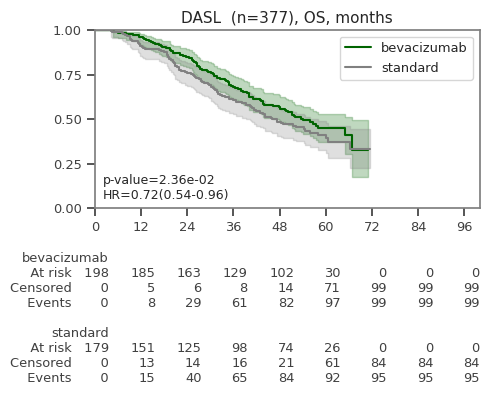

In [10]:
covariates = ["age","FIGO_IIIC","FIGO_IV","OP_1","OP_2", "bevacizumab"]
surv = "OS"
surv_event=surv+"_event"
surv_time=surv+"_time"

fitCPH_and_plotKM_treatments(annot,
                  surv_event=surv_event,
                  surv_time=surv_time,
                  covariates=covariates,
                  title = "%s  (n=%s), %s, months"%("DASL",annot.shape[0],surv))

p-value=0.01
HR=0.72(0.56-0.91)


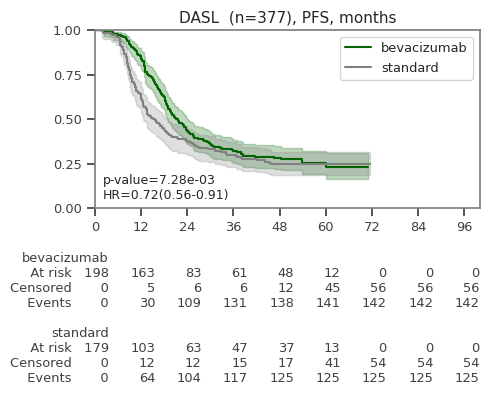

In [11]:
surv = "PFS"
surv_event=surv+"_event"
surv_time=surv+"_time"
fitCPH_and_plotKM_treatments(annot,
                  surv_event=surv_event,
                  surv_time=surv_time,
                  covariates=covariates,
                  title = "%s  (n=%s), %s, months"%("DASL",annot.shape[0],surv))